In [6]:
import psycopg2 as ppg

In [7]:
class postgresCheck():
    
    def __init__(self):
        self.conn = ppg.connect(
        database = 'postgres',
        user = 'rigextract',
        password = 'G1bson!',
        host = 'railroad-prod.cxmxeomzvjpa.us-east-2.rds.amazonaws.com',
        port = '5432')
        
        self.cur1 = self.conn.cursor()
        self.cur2 = self.conn.cursor()
        
        print(self.conn.server_version)
        
    def checkFile(self,filename):
        survey_id = filename.split('.')[0].split('_')[2]
        EAID = "'" + survey_id +"'"
        SQL = """
        SELECT externalattachmentid,surveycompany,surveytype 
        FROM railroad.completesurveydata 
        WHERE externalattachmentid = {}
        """.format(EAID)
        
        self.cur1.execute(SQL)
        self.cur2.execute(SQL)
        
        if len(self.cur1.fetchall()) != 0:
            for record in self.cur2.fetchall():
                EAID, surveyCompany, surveyType = record
                return [surveyCompany,surveyType]
        else:
            return 'missing'
              

In [3]:
p = postgresCheck()

100013


In [8]:
import os
path = 'C:/Users/Fahim/Desktop/Gibson Reports/AI/Temp3'
os.chdir(path)
p = postgresCheck()

100013


In [9]:
company =  'GORDON TECHNOLOGIES LLC'

count = 0

companyList =[]
fileList = []

for filename in os.listdir(path):

    if filename.endswith('.pdf'):
        count += 1
        q = p.checkFile(filename)

        if q != 'missing':
                print(q,filename)


['KOLTEK ENERGY SERVICES, LLC', 'MWD'] dir_survey_5208026.pdf
['CATHEDRAL ENERGY SERVICES INC.', 'MWD'] dir_survey_5208237.pdf
['INVICTUS TOOLS, LLC', 'MWD'] dir_survey_5208326.pdf
['CATHEDRAL ENERGY SERVICES INC.', 'MWD'] dir_survey_5208412.pdf
['QES DIRECTIONAL DRILLING, LLC', 'MWD'] dir_survey_5208537.pdf
['INTREPID D.D.S., LTD.', 'MWD'] dir_survey_5209022.pdf
['PHOENIX TECHNOLOGY SERV USA INC.', 'MWD'] dir_survey_5209038.pdf
['PHOENIX TECHNOLOGY SERV USA INC.', 'MWD'] dir_survey_5209047.pdf
['PHOENIX TECHNOLOGY SERV USA INC.', 'MWD'] dir_survey_5209053.pdf
['PHOENIX TECHNOLOGY SERV USA INC.', 'MWD'] dir_survey_5209061.pdf
['PHOENIX TECHNOLOGY SERV USA INC.', 'MWD'] dir_survey_5209085.pdf
['PHOENIX TECHNOLOGY SERV USA INC.', 'MWD'] dir_survey_5209100.pdf
['PHOENIX TECHNOLOGY SERV USA INC.', 'MWD'] dir_survey_5209106.pdf
['PHOENIX TECHNOLOGY SERV USA INC.', 'MWD'] dir_survey_5209112.pdf
['PHOENIX TECHNOLOGY SERV USA INC.', 'MWD'] dir_survey_5209119.pdf
['PHOENIX TECHNOLOGY SERV USA I

In [10]:
count

200

In [6]:
uniqueCompanies = set(companyList)

In [7]:
# companyFreq = {}
# for item in uniqueCompanies:
#     count = companyList.count(item)
#     companyFreq.update({item:count})
#     print(item,count)  
companyFreq = 

HT MWD SOLUTIONS, LLC 2
KOLTEK ENERGY SERVICES, LLC 2
TRI-CITY SERVICES, INC. 1
CATHEDRAL ENERGY SERVICES INC. 22
PREMIER DIRECTIONAL 14
DIXON DIRECTIONAL, LLC 12
PATRIOT DRILLING SERVICES LLC 6
PHOENIX TECHNOLOGY SERV USA INC. 114
HUNTER DIRECTIONAL SERVICES, LLC 2
TOTAL DIRECTIONAL SERVICES, LLC 18
WEATHERFORD 7
CHOICE DIRECTIONAL SVCS US CORP. 1
TITAN DIRECTIONAL DRILLING, LLC 1
ACCURATE DIRECTIONAL SURVEY, LLC 3
NABORS DRILLING TECH USA, INC. 54
QES DIRECTIONAL DRILLING, LLC 28
GORDON TECHNOLOGIES LLC 202
ALTITUDE ENERGY PARTNERS, LLC 13
LEGACY DIRECTIONAL DRILLING, LLC 74
DRILTECH MWD RENTALS, LLC 1
LEAM DRILLING SERVICES 3
BAKER HUGHES INTEQ 21
GYRODATA 148
SKYLINE DIRECTIONAL DRLG, LLC. 19
FIREROCK ENERGY SERVICES, LLC 3
WESTCOTT DOWN HOLE SERV, INC. 1
LIBERTY DRILLING SERVICES, LLC 2
STRYKER ENERGY DIRCTNL SRVCS,LLC 7
HALLIBURTON ENERGY SERVICES 35
TRUE SHOT, LLC 49
SCHLUMBERGER TECHNOLOGY CORP. 36
METEORITE ENERGY SERVICES INC. 98
AIM DIRECTIONAL SERVICES, LLC 9
NEWSCO INTL EN

{'HT MWD SOLUTIONS, LLC': 2,
 'KOLTEK ENERGY SERVICES, LLC': 2,
 'TRI-CITY SERVICES, INC.': 1,
 'CATHEDRAL ENERGY SERVICES INC.': 22,
 'PREMIER DIRECTIONAL': 14,
 'DIXON DIRECTIONAL, LLC': 12,
 'PATRIOT DRILLING SERVICES LLC': 6,
 'PHOENIX TECHNOLOGY SERV USA INC.': 114,
 'HUNTER DIRECTIONAL SERVICES, LLC': 2,
 'TOTAL DIRECTIONAL SERVICES, LLC': 18,
 'WEATHERFORD': 7,
 'CHOICE DIRECTIONAL SVCS US CORP.': 1,
 'TITAN DIRECTIONAL DRILLING, LLC': 1,
 'ACCURATE DIRECTIONAL SURVEY, LLC': 3,
 'NABORS DRILLING TECH USA, INC.': 54,
 'QES DIRECTIONAL DRILLING, LLC': 28,
 'GORDON TECHNOLOGIES LLC': 202,
 'ALTITUDE ENERGY PARTNERS, LLC': 13,
 'LEGACY DIRECTIONAL DRILLING, LLC': 74,
 'DRILTECH MWD RENTALS, LLC': 1,
 'LEAM DRILLING SERVICES': 3,
 'BAKER HUGHES INTEQ': 21,
 'GYRODATA': 148,
 'SKYLINE DIRECTIONAL DRLG, LLC.': 19,
 'FIREROCK ENERGY SERVICES, LLC': 3,
 'WESTCOTT DOWN HOLE SERV, INC.': 1,
 'LIBERTY DRILLING SERVICES, LLC': 2,
 'STRYKER ENERGY DIRCTNL SRVCS,LLC': 7,
 'HALLIBURTON ENERGY S

In [6]:
import ast
file = open("companyFreq.txt", "r")

contents = file.read()
companyFreq = ast.literal_eval(contents)

file.close()

In [7]:
import matplotlib.pyplot as plt
import numpy as np

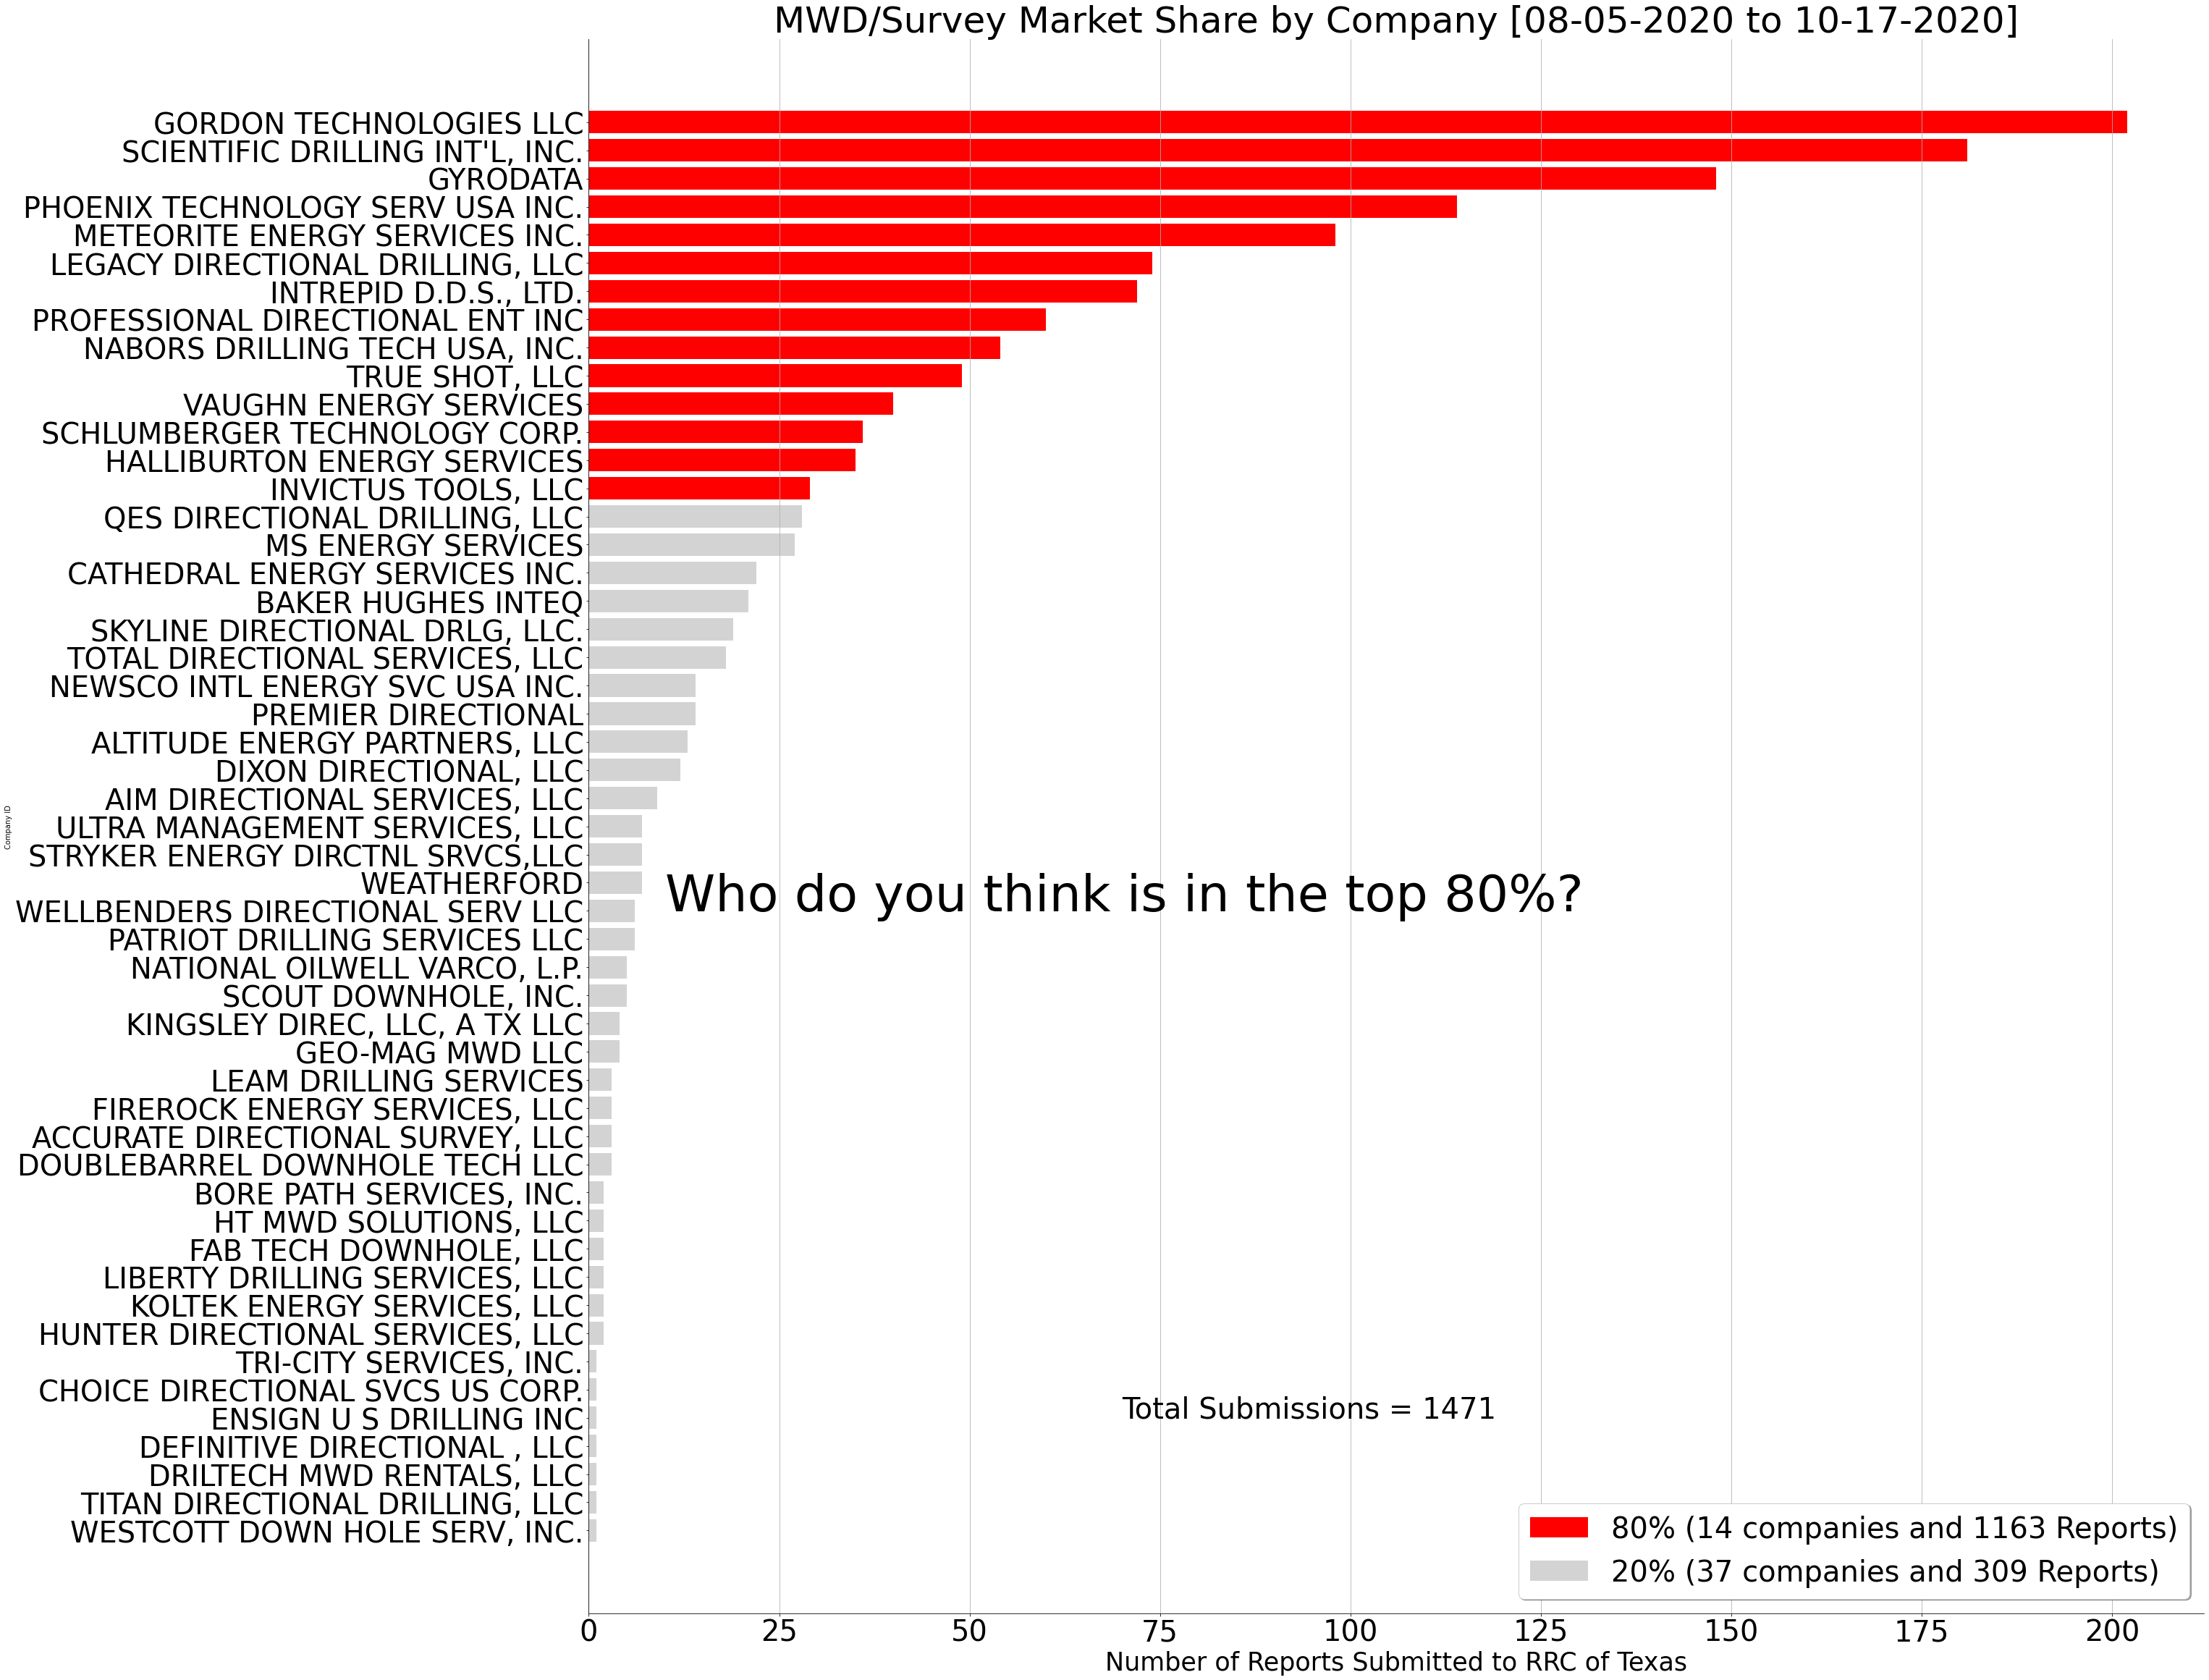

In [19]:
fig2, ax2 = plt.subplots(figsize = (40,40))
# fig2.set_size_inches(30, 30)
y_pos = np.arange(len(companyFreq))
x_pos = np.arange(len(companyFreq))
l1 = ax2.barh(y_pos[37:],companyFreqdf.Frequency[37:], color='r')
l2 = ax2.barh(y_pos[0:37],companyFreqdf.Frequency[0:37], color='lightgrey')

ax2.set_yticks(y_pos)
ax2.set_yticklabels(companyFreqdf.Company);
ax2.set_title('MWD/Survey Market Share by Company [08-05-2020 to 10-17-2020]',pad = 5,size = 50)
ax2.set_xlabel('Number of Reports Submitted to RRC of Texas',size = 35)
ax2.set_ylabel('Company ID',size = 10)
ax2.grid(axis = 'x')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.tick_params(axis='x', which='major', labelsize=40)
plt.tick_params(axis='y', which='major', labelsize=40)
# ax2.set_xticks(x_pos)
# ax2.set_xticklabels(companyFreqdf['Company'], rotation=45)
# ax2.axhline(y=80, xmin=0, xmax=0.29,color = 'r')
# ax2.axhline(y=80, xmin=0.29, xmax=0.95,color = 'b')
ax2.annotate('Total Submissions = 1471',(70,4),size = 40)
ax2.annotate('Who do you think is in the top 80%?',(10,22),size = 70,color = 'k')
# ax2.annotate('Remaining 20%',(20,75),size = 35)
# ax2.annotate('by 37 Companies',(20,72.5),size = 35)
ax2.legend(handles = [l1,l2],labels = ['80% (14 companies and 1163 Reports)','20% (37 companies and 309 Reports)'], 
           loc=4, shadow=True,fancybox = True,prop={'size': 40})


# plt.savefig('SurveyFrequencyChartbyCompany.png', dpi=500)

In [1]:
import pandas as pd
# companyFreqdf = pd.DataFrame(list(companyFreq.items()),columns = ['Company','Frequency'])
companyFreqdf = pd.read_csv('marketShare.csv')


In [2]:
# companyFreqdf.sort_values(by=['Frequency'],ascending = True, inplace = True)
companyFreqdf

,Company,Frequency,Percentage,CumPercentage,color
0,"WESTCOTT DOWN HOLE SERV, INC.",1,0.067981,100.000000,lightgrey
1,"TITAN DIRECTIONAL DRILLING, LLC",1,0.067981,99.796057,lightgrey
2,"DRILTECH MWD RENTALS, LLC",1,0.067981,99.660095,lightgrey
3,"DEFINITIVE DIRECTIONAL , LLC",1,0.067981,99.728076,lightgrey
4,ENSIGN U S DRILLING INC,1,0.067981,99.592114,lightgrey
5,CHOICE DIRECTIONAL SVCS US CORP.,1,0.067981,99.864038,lightgrey
6,"TRI-CITY SERVICES, INC.",1,0.067981,99.932019,lightgrey
7,"HUNTER DIRECTIONAL SERVICES, LLC",2,0.135962,99.524133,lightgrey
8,"KOLTEK ENERGY SERVICES, LLC",2,0.135962,99.388171,lightgrey
9,"LIBERTY DRILLING SERVICES, LLC",2,0.135962,99.252209,lightgrey


In [31]:
companyFreqdf['Percentage'] = (companyFreqdf.Frequency/companyFreqdf.Frequency.sum(axis = 0))*100

In [38]:
companyFreqdf['CumPercentage'] = companyFreqdf['Percentage'].cumsum()

In [33]:
companyFreqdf.reset_index(inplace = True,drop = True)


In [44]:
companyFreqdf.to_csv('companyFreqdf.csv',index = False)

In [56]:
companyFreqdf['color'] = np.where(companyFreqdf['CumPercentage'] >= 80, 'lightgrey','r')

In [214]:
companyFreqdf.Frequency.sum(axis = 0)

1471

In [258]:
companyFreqdf.to_csv('marketShare.csv',index = False)

In [8]:
os.startfile('dir_survey_5127292.pdf')

In [4]:
testList = ['a','b','a','a','a','a','c','b','b','d','a','b','c','c','b','d','d','c','b','a']

In [10]:
unique = set(testList)
freq = {}

In [11]:
for item in unique:
    count = testList.count(item)
    freq.update({item:count})
    print(item,count)

a 7
c 4
b 6
d 3


In [12]:
freq

{'a': 7, 'c': 4, 'b': 6, 'd': 3}

In [25]:
import matplotlib.pyplot as plt
import numpy as np

[Text(0, 0, 'a'), Text(0, 0, 'c'), Text(0, 0, 'b'), Text(0, 0, 'd')]

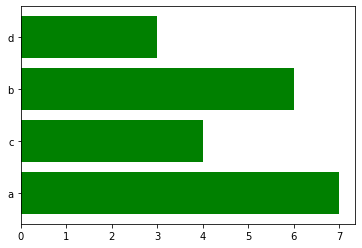

In [31]:
fig, ax = plt.subplots()
y_pos = np.arange(len(freq))
ax.barh(y_pos,freq.values(), color='g')
ax.set_yticks(y_pos)
ax.set_yticklabels(unique)